# Clustering

So far in this course, we've focused our attention in machine learning on two fundamental tasks. 

- **Regression** aims to predict the value of a quantitative variable. 
- **Classification** aims to predict the value of a qualitative variable. 

However, this isn't all there is to machine learning. In this lecture, we're going to take a quick look at another task, called *clustering*. Clustering fits into the broad set of *unsupervised* machine learning tasks. In unsupervised tasks, there's no target variable to predict, and therefore no "right answer." Instead, the aim of an unsupervised algorithm is to explore the data and detect some latent structure. 

Clustering is the most common example of unsupervised tasks. In a clustering task, we hypothesize that the data may be naturally divided into dense clusters. The purpose of a clustering algorithm is to find these clusters. 

This lecture is based on the chapter [*In Depth: k-Means Clustering*](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) of the [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Let's start by generating some synthetic data. The `make_blobs()` function will create a user-specified number of "blobs" of data, each of which are reasonably well-separated from each other. Under the hood, it does this by assigning a true label to each data point, which it then returns as `y_true`. However, in a standard clustering task, we would not assume that the true labels exist, and we won't use them here. 

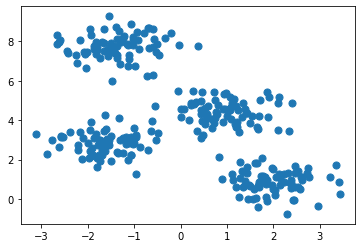

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

fig, ax = plt.subplots(1)
ax.scatter(X[:, 0], X[:, 1], s=50);

Visually, it appears that there are 4 clusters. Let's import `KMeans` and see how we do: 

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

To get cluster labels, we use the `predict()` method: 

In [4]:
y_kmeans = kmeans.predict(X)

Now let's visualize the results. The use of the `c` and `cmap` arguments to `ax.scatter()` allow us to easily plot points of multiple colors. 

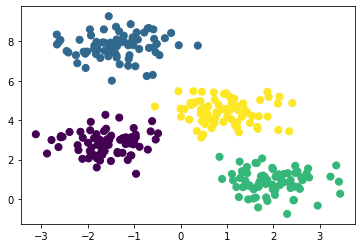

In [5]:
fig, ax = plt.subplots(1)

ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

It looks like `k-means` did a pretty good job of detecting our clusters! 

Under the hood, `k-means` tries to identify a "centroid" for each cluster. The two main principles are: 

1. Each centroid is the mean of all the points to which it corresponds. 
2. Each point is closer to its centroid than to any other centroid. 

The `KMeans` class makes it easy to retrieve the cluster centroids and visualize them. 

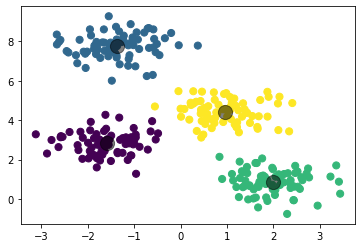

In [6]:
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
fig

We can see that the cluster centroids do indeed correspond pretty nicely to the "middle" of each of the identified clusters. 

This experiment went very well, but of course, things in the real world aren't that easy. Let's take a look at the Palmer Penguins again, for example. 

In [7]:
import urllib
def retrieve_data(url):
    """
    Retrieve a file from the specified url and save it in a local file 
    called data.csv. The intended values of url are:     
    """
    
    # grab the data and parse it
    filedata = urllib.request.urlopen(url) 
    to_write = filedata.read()
    
    # write to file
    with open("data.csv", "wb") as f:
        f.write(to_write)

In [8]:
retrieve_data("https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv")
penguins = pd.read_csv("data.csv")

Let's make a simple scatterplot of the culmen lengths and depths for the penguins. 

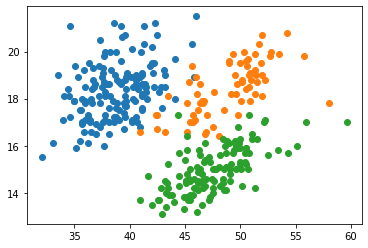

In [9]:
fig, ax = plt.subplots(1)

for s in penguins['Species'].unique():
    df = penguins[penguins['Species'] == s]
    ax.scatter(df['Culmen Length (mm)'], df['Culmen Depth (mm)'], label = s)


When we include the colors, it looks like there might be some clusters of penguins here. Maybe even 3? Let's see. 

In [10]:
X = penguins[["Culmen Length (mm)", "Culmen Depth (mm)"]].dropna()

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

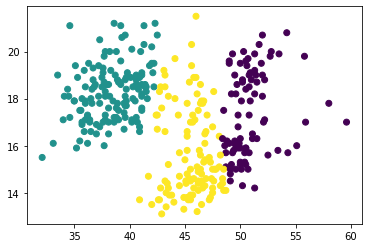

In [11]:
fig, ax = plt.subplots(1)
ax.scatter(X["Culmen Length (mm)"], X["Culmen Depth (mm)"], c = kmeans.predict(X));

Ummmm...these don't really seem like the "right" clusters! There's a reason that `k-means` doesn't do very well on the Penguins data set. `k-means` works best when the clusters are roughly *circular*. On the other hand, the true clusters in the penguins data set appear to be elliptical (stretched out). They also have a somewhat diagonal direction, not aligned with the horizontal or vertical axis. There are more sophisticated clustering algorithms that can handle data with this kind of structure, but we won't focus on them in this class. 

For a nice exposition of a more sophisticated clustering algorithm (with helpful diagrams), you might want to check out Jake VanderPlas's [chapter on Gaussian mixture models](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html) in the [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/). 